In [29]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [30]:
exclude = [
        'Diamond Princess',
        'Grand Princess',
        'American Samoa',
        'Virgin Islands',
        'Northern Mariana Islands',
        'Puerto Rico',
    ]

In [31]:
def global_cases():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum(axis=0)
global_cases()

Confirmed    107340682.0
Deaths         2354561.0
Recovered     60025308.0
Active        44960436.0
dtype: float64

In [32]:
def cases_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=False)
cases_by_country()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,27287159,471567,0,26815592.0
Brazil,9659167,234850,8616282,808035.0
Mexico,1957889,169760,1519572,268557.0
India,10871294,155360,10573372,142562.0
United Kingdom,3996833,115068,10495,3871270.0
...,...,...,...,...
Solomon Islands,18,0,14,4.0
Marshall Islands,4,0,4,0.0
Samoa,2,0,2,0.0


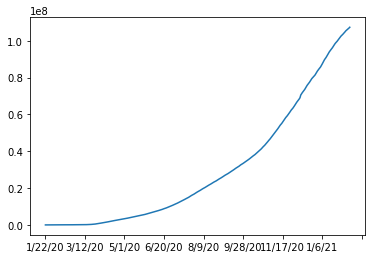

In [33]:
def global_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_confirmed_timeseries().plot()

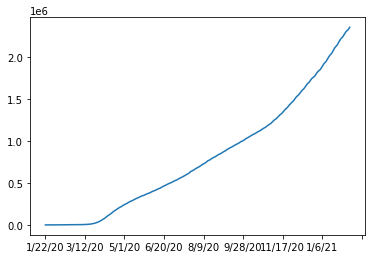

In [34]:
def global_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_deaths_timeseries().plot()

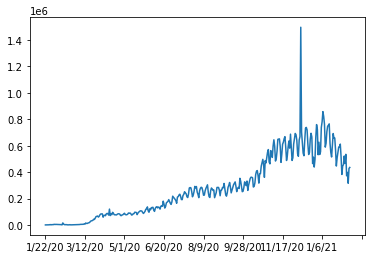

In [35]:
def global_new_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_confirmed_timeseries().plot()

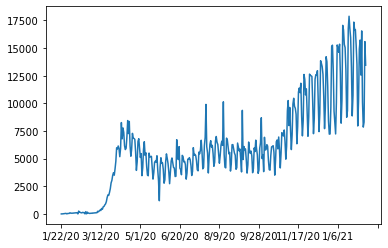

In [36]:
def global_new_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_deaths_timeseries().plot()

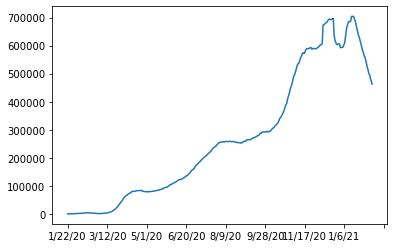

In [37]:
def global_new_confirmed_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_confirmed_14day_moving_average().plot()

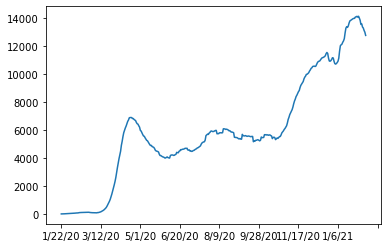

In [38]:
def global_new_deaths_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_deaths_14day_moving_average().plot()

In [39]:
def global_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,26321120,26435557,26557026,26680214,26813772,26917787,27007368,27097095,27192455,27287159
India,0,0,0,0,0,0,0,0,1,1,...,10766245,10777284,10790183,10802591,10814304,10826363,10838194,10847304,10858371,10871294
Brazil,0,0,0,0,0,0,0,0,0,0,...,9229322,9283418,9339420,9396293,9447165,9447165,9524640,9524640,9599565,9659167
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,3846851,3863757,3882972,3903706,3922910,3941273,3957177,3971315,3983756,3996833
Russia,0,0,0,0,0,0,0,0,0,2,...,3825739,3842145,3858367,3874830,3891274,3907653,3923461,3939162,3953970,3968228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS Zaandam,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Marshall Islands,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
Samoa,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [40]:
def global_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,444697,448202,452114,455881,459555,462169,463476,465072,468203,471567
Brazil,0,0,0,0,0,0,0,0,0,0,...,225099,226309,227563,228795,230034,230034,231534,231534,233520,234850
Mexico,0,0,0,0,0,0,0,0,0,0,...,159100,159533,161240,161240,164290,165786,166200,166731,168432,169760
India,0,0,0,0,0,0,0,0,0,0,...,154486,154596,154703,154823,154918,154996,155080,155158,155252,155360
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,106774,108225,109547,110462,111477,112305,112681,113014,114066,115068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Timor-Leste,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Micronesia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
def global_new_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,...,134339.0,114437.0,121469.0,123188.0,133558.0,104015.0,89581.0,89727.0,95360.0,94704.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24591.0,54096.0,56002.0,56873.0,50872.0,0.0,77475.0,0.0,74925.0,59602.0
France,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,4388.0,23337.0,26406.0,20.0,45607.0,20588.0,19715.0,4343.0,18886.0,25678.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79686.0,29064.0,31596.0,29960.0,28565.0,0.0,0.0,47095.0,16402.0,18114.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,17391.0,16406.0,16222.0,16463.0,16444.0,16379.0,15808.0,15701.0,14808.0,14258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Papua New Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,0.0,24.0,0.0,4.0,5.0,0.0,0.0
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,74.0,0.0,36.0,22.0,77.0,27.0,0.0


In [42]:
global_new_confirmed_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.333333,0.25,0.8,0.666667,0.571429,0.714286,0.714286,0.857143,...,146019.142857,141424.857143,136995.000000,130504.714286,125854.000000,120414.571429,117226.714286,110853.571429,108128.285714,104304.714286
Brazil,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,51132.714286,50008.857143,48934.857143,48229.428571,46950.285714,38598.571429,45701.285714,42188.285714,45163.857143,45678.142857
France,0.0,0.0,0.666667,0.75,0.6,0.500000,0.571429,0.714286,0.714286,0.428571,...,20564.714286,20735.285714,20657.428571,20560.857143,20434.000000,19940.142857,20008.714286,20002.285714,19366.428571,19262.428571
Spain,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,32774.714286,31721.714286,30480.428571,29774.857143,28410.142857,28410.142857,28410.142857,23754.285714,21945.428571,20019.428571
Russia,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,...,18213.285714,17988.142857,17810.714286,17468.857143,17108.571429,16769.714286,16444.714286,16203.285714,15975.000000,15694.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Papua New Guinea,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.571429,2.428571,2.285714,2.285714,5.714286,5.714286,6.285714,4.714286,4.714286,4.714286
Grenada,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Guinea,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.714286,25.142857,17.142857,27.714286,25.428571,27.142857,20.142857,29.857143,33.714286,33.714286


In [43]:
def global_new_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2051.0,3505.0,3912.0,3767.0,3674.0,2614.0,1307.0,1596.0,3131.0,3364.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,595.0,1210.0,1254.0,1232.0,1239.0,0.0,1500.0,0.0,1986.0,1330.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,564.0,433.0,1707.0,0.0,3050.0,1496.0,414.0,531.0,1701.0,1328.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,407.0,1451.0,1322.0,915.0,1015.0,828.0,376.0,333.0,1052.0,1002.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,896.0,933.0,784.0,858.0,690.0,227.0,157.0,483.0,815.0,666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Papua New Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cameroon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Central African Republic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
global_new_deaths_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3174.285714,3095.714286,3089.571429,3054.857143,3065.857143,3049.142857,2975.714286,2910.714286,2857.285714,2779.000000
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1062.142857,1061.571429,1057.428571,1035.428571,1052.571429,869.857143,1004.285714,919.285714,1030.142857,1041.000000
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1261.000000,1073.857143,1085.857143,870.714286,1101.571429,1101.714286,1094.857143,1090.142857,1271.285714,1217.142857
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1150.142857,1123.714286,1066.000000,1019.714286,986.428571,932.571429,902.000000,891.428571,834.428571,788.714286
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,704.571429,767.571429,754.000000,678.714286,719.714286,635.142857,649.285714,590.285714,573.428571,556.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Papua New Guinea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cameroon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,1.714286,0.000000,0.000000
Central African Republic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


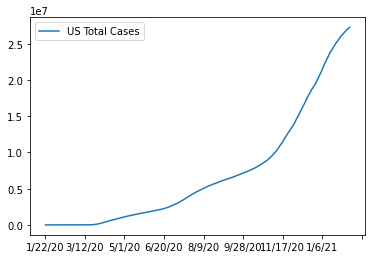

In [45]:
def us_total_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Cases': df})
us_total_confirmed_cases().plot()

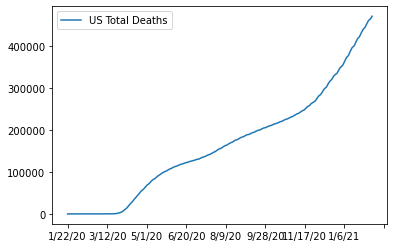

In [46]:
def us_total_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Deaths': df})
us_total_deaths().plot()

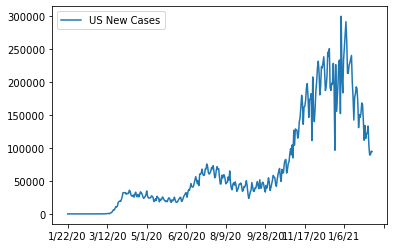

In [47]:
def us_new_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'US New Cases': df})
us_new_confirmed_cases().plot()

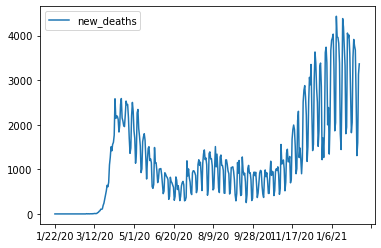

In [48]:
def us_new_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'new_deaths': df})
us_new_deaths().plot()

,new_confirmed
Province_State,
Texas,12727
California,8504
Florida,7537
New York,6584
New Jersey,4370
North Carolina,3833
Georgia,3490
Ohio,3281
Virginia,3203


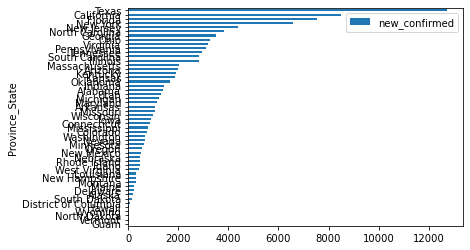

In [49]:
def new_confirmed_cases_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_confirmed'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_confirmed'], ascending=False)
new_confirmed_cases_by_state().sort_values(['new_confirmed'], ascending=True).plot.barh()
new_confirmed_cases_by_state()

,new_deaths
Province_State,
California,487
Texas,349
Alabama,309
Arizona,176
New York,172
Florida,160
New Jersey,147
Pennsylvania,136
North Carolina,135


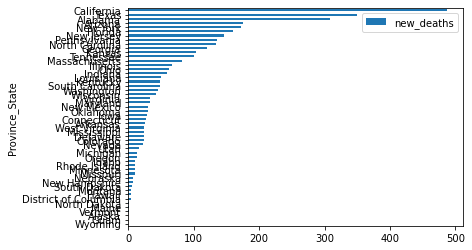

In [50]:
def new_deaths_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_deaths'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_deaths'], ascending=False)
new_deaths_by_state().sort_values(['new_deaths'], ascending=True).plot.barh()
new_deaths_by_state()

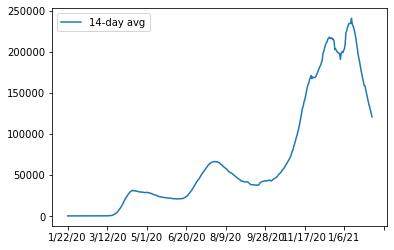

In [51]:
def us_new_cases_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_cases_14day_moving_avg().plot()

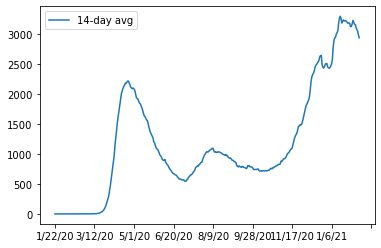

In [52]:
def us_new_deaths_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_deaths_14day_moving_avg().plot()

In [53]:
def confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,460860,462938,465056,467823,469319,471311,472423,473348,474666,476067
Alaska,0,0,0,0,0,0,0,0,0,0,...,54459,54594,54820,55005,55259,55259,55259,55768,55893,56097
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,762145,765083,767379,771796,775622,779093,780637,782887,787268,789245
Arkansas,0,0,0,0,0,0,0,0,0,0,...,296494,298004,300430,302899,304723,306064,306736,307373,308848,309940
California,0,0,0,0,2,2,2,2,2,3,...,3342647,3355781,3368281,3382932,3399745,3408241,3417982,3432088,3442672,3451176
Colorado,0,0,0,0,0,0,0,0,0,0,...,397101,398037,399267,400851,402754,404256,405330,406276,407210,407961
Connecticut,0,0,0,0,0,0,0,0,0,0,...,253954,256522,257004,257941,259372,259372,259372,263739,264608,265496
Delaware,0,0,0,0,0,0,0,0,0,0,...,78495,78696,78982,79225,79546,79832,80594,80931,81210,81461


In [54]:
def deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,7688,7894,8203,8365,8449,8513,8515,8523,8579,8888
Alaska,0,0,0,0,0,0,0,0,0,0,...,262,279,279,279,279,279,279,279,280,280
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,13124,13362,13576,13752,13948,14011,14048,14055,14286,14462
Arkansas,0,0,0,0,0,0,0,0,0,0,...,4895,4939,4985,5009,5050,5061,5076,5106,5148,5174
California,0,0,0,0,0,0,0,0,0,0,...,41402,41902,42484,43120,43690,43991,44155,44494,45009,45496
Colorado,0,0,0,0,0,0,0,0,0,0,...,5641,5650,5664,5682,5705,5722,5731,5733,5746,5770
Connecticut,0,0,0,0,0,0,0,0,0,0,...,7119,7133,7157,7185,7214,7214,7214,7282,7298,7326
Delaware,0,0,0,0,0,0,0,0,0,0,...,1101,1108,1130,1135,1191,1202,1208,1208,1221,1245


In [55]:
def new_confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1221.0,2078.0,2118.0,2767.0,1496.0,1992.0,1112.0,925.0,1318.0,1401.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,108.0,135.0,226.0,185.0,254.0,0.0,0.0,509.0,125.0,204.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3741.0,2938.0,2296.0,4417.0,3826.0,3471.0,1544.0,2250.0,4381.0,1977.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1226.0,1510.0,2426.0,2469.0,1824.0,1341.0,672.0,637.0,1475.0,1092.0
California,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,18383.0,13134.0,12500.0,14651.0,16813.0,8496.0,9741.0,14106.0,10584.0,8504.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,916.0,936.0,1230.0,1584.0,1903.0,1502.0,1074.0,946.0,934.0,751.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3931.0,2568.0,482.0,937.0,1431.0,0.0,0.0,4367.0,869.0,888.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,424.0,201.0,286.0,243.0,321.0,286.0,762.0,337.0,279.0,251.0


In [56]:
def new_deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,206.0,309.0,162.0,84.0,64.0,2.0,8.0,56.0,309.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,238.0,214.0,176.0,196.0,63.0,37.0,7.0,231.0,176.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,44.0,46.0,24.0,41.0,11.0,15.0,30.0,42.0,26.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,474.0,500.0,582.0,636.0,570.0,301.0,164.0,339.0,515.0,487.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,9.0,14.0,18.0,23.0,17.0,9.0,2.0,13.0,24.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,14.0,24.0,28.0,29.0,0.0,0.0,68.0,16.0,28.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,7.0,22.0,5.0,56.0,11.0,6.0,0.0,13.0,24.0
